In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("../data/Week1_challenge_data_source.csv")

In [14]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04/04/2019 12:01,770.0,25/04/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,09/04/2019 13:04,235.0,25/04/2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,09/04/2019 17:42,1.0,25/04/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,10/04/2019 00:31,486.0,25/04/2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,12/04/2019 20:10,565.0,25/04/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [15]:
data.size

8250055

In [16]:
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 150001 rows and 55 columns


In [17]:
data.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [19]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893170e+18,288.611834,288.097653,8.103762e+04,2.149289e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744050e+04,2.082010e+14,3.365130e+10,3.546070e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366371e+10,3.572200e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304240e+19,749.000000,750.000000,1.324302e+05,2.082020e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [20]:
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [21]:
def percent_missing(data):

    # Calculate total number of cells in dataframe
    totalCells = np.product(data.shape)

    # Count number of missing values per column
    missingCount = data.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Tellcom Data contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The Tellcom Data contains 12.5 % missing values.


In [22]:
#column(s) with missing values
data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [23]:
round(100*(data.isnull().sum(axis=0)/len(data.index)), 2).sort_values(ascending = False) # % of nulls in each column
data.isnull().all(axis=0) # Columns having all nulls
data.isnull().any(axis=0) # Columns having at least one null

Bearer Id                                    True
Start                                        True
Start ms                                     True
End                                          True
End ms                                       True
Dur. (ms)                                    True
IMSI                                         True
MSISDN/Number                                True
IMEI                                         True
Last Location Name                           True
Avg RTT DL (ms)                              True
Avg RTT UL (ms)                              True
Avg Bearer TP DL (kbps)                      True
Avg Bearer TP UL (kbps)                      True
TCP DL Retrans. Vol (Bytes)                  True
TCP UL Retrans. Vol (Bytes)                  True
DL TP < 50 Kbps (%)                          True
50 Kbps < DL TP < 250 Kbps (%)               True
250 Kbps < DL TP < 1 Mbps (%)                True
DL TP > 1 Mbps (%)                           True


In [24]:
# skewness along the index axis
data.skew(axis = 0, skipna = True)

C:\Users\hp\AppData\Local\Temp/ipykernel_12156/1919563797.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew(axis = 0, skipna = True)


Bearer Id                                     0.026667
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         40.992855
MSISDN/Number                               332.155855
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

In [25]:
#unique value count
pd.DataFrame(data.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

,Unique Value Count
IMSI,9
Bearer Id,10
UL TP > 300 Kbps (%),64
50 Kbps < UL TP < 300 Kbps (%),69
250 Kbps < DL TP < 1 Mbps (%),74
50 Kbps < DL TP < 250 Kbps (%),85
10 Kbps < UL TP < 50 Kbps (%),86
DL TP > 1 Mbps (%),86
UL TP < 10 Kbps (%),99
DL TP < 50 Kbps (%),101


In [26]:
# drop columns with more than 30% missing values
data_clean = data.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
data_clean= data_clean.dropna(how='all')
data_clean.shape

(150001, 45)

In [27]:
# Changing start and end dates to date data type
data_clean['Start']=pd.to_datetime(data_clean['Start'])
data_clean['End']=pd.to_datetime(data_clean['End'])

In [28]:
# Checking to see 15 data samples of the cleaned data

data_clean.sample(15)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
12650,1.304240e+19,2019-04-24 18:01:00,53.0,2019-04-25 00:20:00,794.0,22716.0,2.082010e+14,3.367081e+10,3.563970e+13,T40077A,...,18640294.0,9849911.0,20286128.0,16227530.0,583447892.0,5593454.0,215896713.0,5372977.0,38570030.0,632613585.0
130421,7.349880e+18,2019-04-28 11:38:00,142.0,2019-04-30 09:58:00,160.0,166816.0,2.082020e+14,3.361649e+10,3.533170e+13,L31969A,...,783950.0,306488.0,10555473.0,7185213.0,513989356.0,10936796.0,462709751.0,15303918.0,35892822.0,538815810.0
19775,1.304240e+19,2019-04-24 20:00:00,367.0,2019-04-25 00:03:00,915.0,14583.0,2.082020e+14,3.362222e+10,3.536860e+13,D40596A,...,20545146.0,6185922.0,3441355.0,1092980.0,659702018.0,2035446.0,414997693.0,4326229.0,16664568.0,695321503.0
146593,1.311450e+19,2019-04-29 06:39:00,470.0,2019-04-30 08:33:00,276.0,93253.0,2.082020e+14,3.360215e+10,3.579400e+13,L94377B,...,8122355.0,15793070.0,12741069.0,20909465.0,47793798.0,5295231.0,87562230.0,7103778.0,50800509.0,72577531.0
49634,7.349880e+18,2019-04-25 07:53:00,849.0,2019-04-26 08:44:00,896.0,89467.0,2.082020e+14,3.376035e+10,3.569880e+13,T10172B,...,317863.0,307515.0,14888194.0,1627408.0,558829572.0,5339039.0,550192506.0,12044160.0,21980278.0,577456280.0
109575,7.349880e+18,2019-04-27 17:33:00,279.0,2019-04-29 06:01:00,387.0,131267.0,2.082020e+14,3.362384e+10,8.655450e+13,D93954B,...,2638205.0,1116249.0,1328597.0,6051987.0,538160481.0,8416762.0,238067939.0,3291029.0,23549006.0,556708921.0
134290,1.311450e+19,2019-04-28 20:45:00,580.0,2019-04-30 04:34:00,473.0,114543.0,2.082100e+14,3.365207e+10,8.676270e+13,D41331B,...,11007580.0,356479.0,14095237.0,19835714.0,386096484.0,3581733.0,258611894.0,6565677.0,33660604.0,414601409.0
90827,1.304240e+19,2019-04-27 14:33:00,848.0,2019-04-27 23:16:00,723.0,31378.0,2.082020e+14,3.360329e+10,3.589790e+13,T85715A,...,8112647.0,14080315.0,6823273.0,5168707.0,228943150.0,15306385.0,834662479.0,9654979.0,44926231.0,254454542.0
11962,1.304240e+19,2019-04-24 17:42:00,698.0,2019-04-25 03:58:00,184.0,36949.0,2.082020e+14,3.366778e+10,8.637690e+13,T21359B,...,11446941.0,15811.0,22090242.0,18153104.0,647268619.0,7013503.0,32754294.0,1496045.0,29163122.0,691745384.0
16676,7.349880e+18,2019-04-24 19:16:00,308.0,2019-04-25 02:08:00,258.0,24740.0,2.082020e+14,3.368478e+10,3.554050e+13,D20901A,...,22242303.0,15012098.0,1492366.0,13893732.0,163343040.0,14697638.0,509273403.0,11608207.0,55653271.0,190964521.0


In [29]:
# Droping rows with missing values

data_clean = data_clean.dropna(subset=['Bearer Id'])
data_clean = data_clean.dropna(subset=['Start'])
data_clean = data_clean.dropna(subset=['End'])
data_clean = data_clean.dropna(subset=['IMSI'])
data_clean = data_clean.dropna(subset=['MSISDN/Number'])

data_clean.shape

(148506, 45)

In [30]:
# Checking the number of Null values in our columns and verify all the missing values are gone

data_clean.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [31]:
# Taking out all the columns that has missing value

missing_value_lists = ['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)',
'250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Last Location Name','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']


In [32]:
# Finding out the data types of each missing value containing columns

for value in missing_value_lists:
  print(data_clean[value].dtype,value)

float64 DL TP < 50 Kbps (%)
float64 50 Kbps < DL TP < 250 Kbps (%)
float64 250 Kbps < DL TP < 1 Mbps (%)
float64 DL TP > 1 Mbps (%)
float64 UL TP < 10 Kbps (%)
float64 10 Kbps < UL TP < 50 Kbps (%)
float64 50 Kbps < UL TP < 300 Kbps (%)
float64 UL TP > 300 Kbps (%)
object Last Location Name
float64 Avg RTT DL (ms)
float64 Avg RTT UL (ms)
float64 Nb of sec with Vol DL < 6250B
float64 Nb of sec with Vol UL < 1250B


In [33]:
# Now we saw that all the datatypes are float except the "Last Location Name" column
# We will do fill method mode for the "Last Location Name" 
# We will do fill method mean/median for the other columns

for value in missing_value_lists:
  if(value!="Last Location Name"):
    data_clean[value] = data_clean[value].fillna(data_clean[value].mean())
  else:
    data_clean[value] = data_clean[value].fillna(data_clean[value].mode()[0])
data_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [34]:
# Creating a clean csv file

data_clean.to_csv('../data/clean_telecom_data.csv',index=False)

Identifying the top 10 handsets used by the customers

<AxesSubplot:>

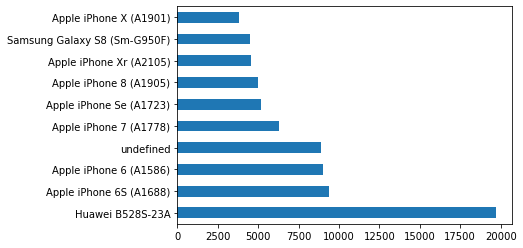

In [35]:
#checking frequency of occurrence of unique values in a column
handset_frequency = data_clean['Handset Type'].value_counts()
handset_frequency[0:10]

data_clean['Handset Type'].value_counts()[:10].plot(kind='barh')

Identifying the top 3 handset manufacturers

<AxesSubplot:>

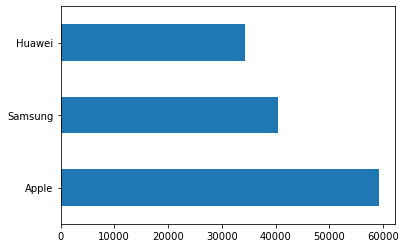

In [49]:
#checking top 3 handset manufacturers
top_3_handset_manufacturers = data_clean['Handset Manufacturer'].value_counts()[:3].plot(kind='barh')
top_3_handset_manufacturers

Identifying the top 5 handsets per top 3 handset manufacturer

<AxesSubplot:>

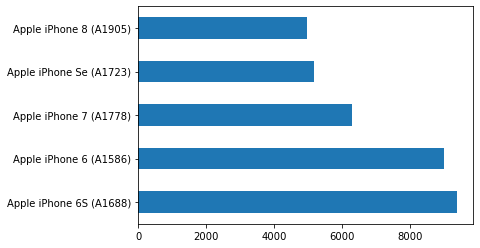

In [50]:
#checking top 5 handsets for Apple manufacturer
handset_manufacturer_group = data_clean.groupby(['Handset Manufacturer'])
handset_manufacturer_group.get_group('Apple')['Handset Type'].value_counts()[0:5].plot(kind='barh')

<AxesSubplot:>

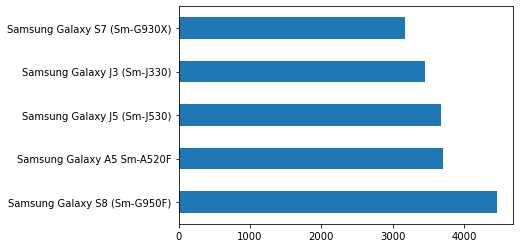

In [51]:
#checking top 5 handsets for Samsung manufacturer
handset_manufacturer_group = data_clean.groupby(['Handset Manufacturer'])
handset_manufacturer_group.get_group('Samsung')['Handset Type'].value_counts()[0:5].plot(kind='barh')

<AxesSubplot:>

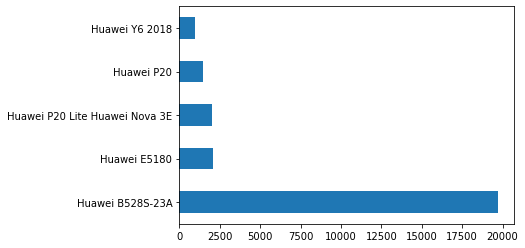

In [52]:
#checking top 5 handsets for Huawei manufacturer
handset_manufacturer_group = data_clean.groupby(['Handset Manufacturer'])
handset_manufacturer_group.get_group('Huawei')['Handset Type'].value_counts()[0:5].plot(kind='barh')

Short interpretation and recommendation to marketing teams

From the brief analysis performed above, we see that the top manufactures are Huawei, Apple and Samsung. I would recommend the marketing team to do more advertising targeting the three manufacturers.

User Overview Analysis

In [53]:
# Adding two columns and creating new column and make the float display format to give in 1 decimal place 

pd.set_option('display.float_format', lambda x: '%.1f' % x)

data_clean['Total_UL_and_DL'] = data_clean['Total UL (Bytes)'] + data_clean['Total DL (Bytes)']
data_clean['Other_UL_and_DL'] = data_clean['Other UL (Bytes)'] + data_clean['Other DL (Bytes)']
data_clean['Gaming_UL_and_DL'] = data_clean['Gaming UL (Bytes)'] + data_clean['Gaming DL (Bytes)']
data_clean['Netflix_UL_and_DL'] = data_clean['Netflix UL (Bytes)'] + data_clean['Netflix DL (Bytes)']
data_clean['Youtube_UL_and_DL'] = data_clean['Youtube UL (Bytes)'] + data_clean['Youtube DL (Bytes)']
data_clean['Email_UL_and_DL'] = data_clean['Email UL (Bytes)'] + data_clean['Email DL (Bytes)']
data_clean['Google_UL_and_DL'] = data_clean['Google UL (Bytes)'] + data_clean['Google DL (Bytes)']
data_clean['Social Media_UL_and_DL'] = data_clean['Social Media UL (Bytes)'] + data_clean['Social Media DL (Bytes)']
data_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201000000000.0,33664962239.0,35521200000000.0,9.16457E+15,...,36749741.0,308879636.0,345629377.0,180558843.0,292426453.0,17855187.0,18355943.0,3701304.0,2905912.0,1570185.0
1,13114500000000000000.0,2019-09-04 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208202000000000.0,33681854413.0,35794000000000.0,L77566A,...,53800391.0,653384965.0,707185356.0,541959383.0,609920783.0,35565545.0,39359124.0,937385.0,4414096.0,1933278.0
2,13114500000000000000.0,2019-09-04 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200000000000.0,33760627129.0,35281500000000.0,D42335A,...,27883638.0,279807335.0,307690973.0,414908351.0,229980251.0,23751202.0,34425237.0,3363124.0,10229119.0,1726277.0
3,13114500000000000000.0,2019-10-04 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201000000000.0,33750343200.0,35356600000000.0,T21824A,...,43324218.0,846028530.0,889352748.0,761837216.0,810387875.0,15092588.0,36534765.0,2070983.0,11811761.0,657493.0
4,13114500000000000000.0,2019-12-04 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201000000000.0,33699795932.0,35407000000000.0,D88865A,...,38542814.0,569138589.0,607681403.0,564619822.0,531237049.0,17539799.0,34222253.0,2110349.0,7748843.0,912788.0


In [54]:
# Creating new data from the data_clean

new_column = ['Bearer Id','Dur. (ms)','MSISDN/Number','Total_UL_and_DL','Other_UL_and_DL','Gaming_UL_and_DL','Netflix_UL_and_DL','Youtube_UL_and_DL','Email_UL_and_DL','Google_UL_and_DL','Social Media_UL_and_DL']
user_overview_data = data_clean[new_column]
user_overview_data.head(3)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,1823652.0,33664962239.0,345629377.0,180558843.0,292426453.0,17855187.0,18355943.0,3701304.0,2905912.0,1570185.0
1,13114500000000000000.0,1365104.0,33681854413.0,707185356.0,541959383.0,609920783.0,35565545.0,39359124.0,937385.0,4414096.0,1933278.0
2,13114500000000000000.0,1361762.0,33760627129.0,307690973.0,414908351.0,229980251.0,23751202.0,34425237.0,3363124.0,10229119.0,1726277.0


In [55]:
# Importing the warning library to ignore the warning messages that are not that much important

import warnings
warnings.filterwarnings('ignore')

In [56]:
# Converting columns containing bytes to megabytes

for column in new_column:
  if(column != 'Bearer Id' and column != 'Dur. (ms)' and column != 'MSISDN/Number'):
    user_overview_data[column]= user_overview_data[column]/(10**6)
    
user_overview_data.head(4)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,1823652.0,33664962239.0,345.6,180.6,292.4,17.9,18.4,3.7,2.9,1.6
1,13114500000000000000.0,1365104.0,33681854413.0,707.2,542.0,609.9,35.6,39.4,0.9,4.4,1.9
2,13114500000000000000.0,1361762.0,33760627129.0,307.7,414.9,230.0,23.8,34.4,3.4,10.2,1.7
3,13114500000000000000.0,1321509.0,33750343200.0,889.4,761.8,810.4,15.1,36.5,2.1,11.8,0.7


In [57]:
# Grouping the data by user and aggregating the data contained in them
# Grouping Using MSISDN/Number

users = user_overview_data.groupby(['MSISDN/Number'])
users_aggregated = users.agg({'Bearer Id':'count','Dur. (ms)':'sum','Total_UL_and_DL':'sum','Other_UL_and_DL':'sum','Gaming_UL_and_DL':'sum','Netflix_UL_and_DL':'sum','Youtube_UL_and_DL':'sum','Email_UL_and_DL':'sum','Google_UL_and_DL':'sum','Social Media_UL_and_DL':'sum'})
users_aggregated['Num_of_xDR_sessions']=users_aggregated['Bearer Id']
users_aggregated.head(10)

,Bearer Id,Dur. (ms),Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL,Num_of_xDR_sessions
MSISDN/Number,,,,,,,,,,,
33601001722.0,1,116720.0,878.7,386.6,812.5,27.2,21.6,1.3,4.4,2.2,1
33601001754.0,1,181230.0,156.9,281.7,119.8,11.2,12.4,3.3,5.3,2.7,1
33601002511.0,1,134969.0,596.0,501.7,538.8,19.4,21.3,3.2,3.4,3.2,1
33601007832.0,1,49878.0,422.3,35.3,391.1,1.9,7.0,2.3,9.7,0.3,1
33601008617.0,2,37104.0,1457.4,804.8,1314.8,49.2,41.5,3.3,18.5,2.9,2
33601010682.0,2,253983.0,615.2,492.4,511.6,30.3,34.3,7.8,15.3,3.8,2
33601011634.0,2,128360.0,654.7,224.9,548.5,45.8,26.4,1.4,10.2,2.8,2
33601011959.0,1,86399.0,332.7,178.2,282.4,15.3,18.9,2.2,12.0,1.8,1
33601014694.0,2,495702.0,990.1,1041.9,833.1,54.2,63.4,4.6,14.1,5.3,2


Univariate Analysis

>Non-graphical Univariate Analysis

In [58]:
# Changing the data type of Bearer Id to string to make an object type univariate analysis

users_aggregated['Bearer Id'] = users_aggregated['Bearer Id'].astype(str)
users_aggregated.dtypes

Bearer Id                  object
Dur. (ms)                 float64
Total_UL_and_DL           float64
Other_UL_and_DL           float64
Gaming_UL_and_DL          float64
Netflix_UL_and_DL         float64
Youtube_UL_and_DL         float64
Email_UL_and_DL           float64
Google_UL_and_DL          float64
Social Media_UL_and_DL    float64
Num_of_xDR_sessions         int64
dtype: object

In [59]:
# Non-graphical univariate analysis of Bearer Id

users_aggregated['Bearer Id'].describe()

count     106471
unique        17
top            1
freq       77384
Name: Bearer Id, dtype: object

In [60]:
# Non-graphical univariate analysis of Dur. (ms)

users_aggregated['Dur. (ms)'].describe()

count     106471.0
mean      146571.5
std       186562.7
min         7142.0
25%        72399.5
50%       103137.0
75%       172799.0
max     18553754.0
Name: Dur. (ms), dtype: float64

In [61]:
# Non-graphical univariate analysis of Total_UL_and_DL

users_aggregated['Total_UL_and_DL'].describe()

count   106471.0
mean       691.5
std        491.5
min         33.2
25%        358.8
50%        618.3
75%        857.9
max       8846.2
Name: Total_UL_and_DL, dtype: float64

In [62]:
# Non-graphical univariate analysis of Other_UL_and_DL

users_aggregated['Other_UL_and_DL'].describe()

count   106471.0
mean       598.9
std        449.3
min          0.1
25%        285.9
50%        540.1
75%        775.6
max       8167.9
Name: Other_UL_and_DL, dtype: float64

In [63]:
# Non-graphical univariate analysis of Gaming_UL_and_DL

users_aggregated['Gaming_UL_and_DL'].describe()

count   106471.0
mean       600.3
std        449.6
min          0.3
25%        288.2
50%        542.7
75%        777.7
max       7749.4
Name: Gaming_UL_and_DL, dtype: float64

In [64]:
# Non-graphical univariate analysis of Netflix_UL_and_DL

users_aggregated['Netflix_UL_and_DL'].describe()

count   106471.0
mean        31.6
std         21.3
min          0.2
25%         18.6
50%         26.7
75%         38.0
max        399.5
Name: Netflix_UL_and_DL, dtype: float64

In [65]:
# Non-graphical univariate analysis of Youtube_UL_and_DL

users_aggregated['Youtube_UL_and_DL'].describe()

count   106471.0
mean        31.6
std         21.3
min          0.1
25%         18.6
50%         26.8
75%         38.0
max        453.0
Name: Youtube_UL_and_DL, dtype: float64

In [66]:
# Non-graphical univariate analysis of Email_UL_and_DL

users_aggregated['Email_UL_and_DL'].describe()

count   106471.0
mean         3.2
std          2.2
min          0.0
25%          1.7
50%          2.8
75%          3.8
max         42.4
Name: Email_UL_and_DL, dtype: float64

In [67]:
# Non-graphical univariate analysis of Google_UL_and_DL

users_aggregated['Google_UL_and_DL'].describe()

count   106471.0
mean        10.9
std          7.6
min          0.0
25%          5.9
50%          9.6
75%         13.2
max        152.2
Name: Google_UL_and_DL, dtype: float64

In [68]:
# Non-graphical univariate analysis of Social Media_UL_and_DL

users_aggregated['Social Media_UL_and_DL'].describe()

count   106471.0
mean         2.5
std          1.9
min          0.0
25%          1.2
50%          2.3
75%          3.3
max         43.4
Name: Social Media_UL_and_DL, dtype: float64

In [76]:
# Non-graphical univariate analysis of Dur. (ms)

users_aggregated['Dur. (ms)'].describe()

count     106471.0
mean      146571.5
std       186562.7
min         7142.0
25%        72399.5
50%       103137.0
75%       172799.0
max     18553754.0
Name: Dur. (ms), dtype: float64

> Graphical Univariate Analysis

In [77]:
# Defining the plot functions

def plot_univariate(df, col1, col2):
    plt.figure(figsize = (20, 15))

    plt.subplot(2, 2, 1)
    plt.hist(df[col1], bins = 20, color = 'orange', edgecolor = 'gray', linewidth = 0.5)
    plt.title(f'Histogram of {col1}', size=14)

    plt.subplot(2, 2, 2)
    plt.boxplot(df[col1])
    plt.title(f'Boxplot of {col1}', size=14)

    plt.subplot(2, 2, 3)
    plt.hist(df[col2], bins=20, color='orange', edgecolor='gray', linewidth=0.5)
    plt.title(f'Histogram of {col2}', size=14)

    plt.subplot(2, 2, 4)
    plt.boxplot(df[col2])
    plt.title(f'Boxplot of {col2}', size=14)
    
       

    plt.show()

In [79]:
# Fixing the outliers function

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

user_overview_data.head(2)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,86399.0,33664962239.0,345.6,180.6,292.4,17.9,18.4,3.7,2.9,1.6
1,13114500000000000000.0,86399.0,33681854413.0,707.2,542.0,609.9,35.6,22.7,0.9,4.4,1.9


In [80]:
# Fixing the outliers in each column

user_overview_data['Dur. (ms)']=fix_outlier(user_overview_data,'Dur. (ms)')
user_overview_data['Total_UL_and_DL']=fix_outlier(user_overview_data,'Total_UL_and_DL')
user_overview_data['Other_UL_and_DL']=fix_outlier(user_overview_data,'Other_UL_and_DL')
user_overview_data['Gaming_UL_and_DL']=fix_outlier(user_overview_data,'Gaming_UL_and_DL')
user_overview_data['Netflix_UL_and_DL']=fix_outlier(user_overview_data,'Netflix_UL_and_DL')
user_overview_data['Youtube_UL_and_DL']=fix_outlier(user_overview_data,'Youtube_UL_and_DL')
user_overview_data['Email_UL_and_DL']=fix_outlier(user_overview_data,'Email_UL_and_DL')
user_overview_data['Google_UL_and_DL']=fix_outlier(user_overview_data,'Google_UL_and_DL')
user_overview_data['Social Media_UL_and_DL']=fix_outlier(user_overview_data,'Social Media_UL_and_DL')

user_overview_data.head(2)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,86399.0,33664962239.0,345.6,180.6,292.4,17.9,18.4,2.3,2.9,1.6
1,13114500000000000000.0,86399.0,33681854413.0,707.2,542.0,609.9,22.6,22.7,0.9,4.4,1.9


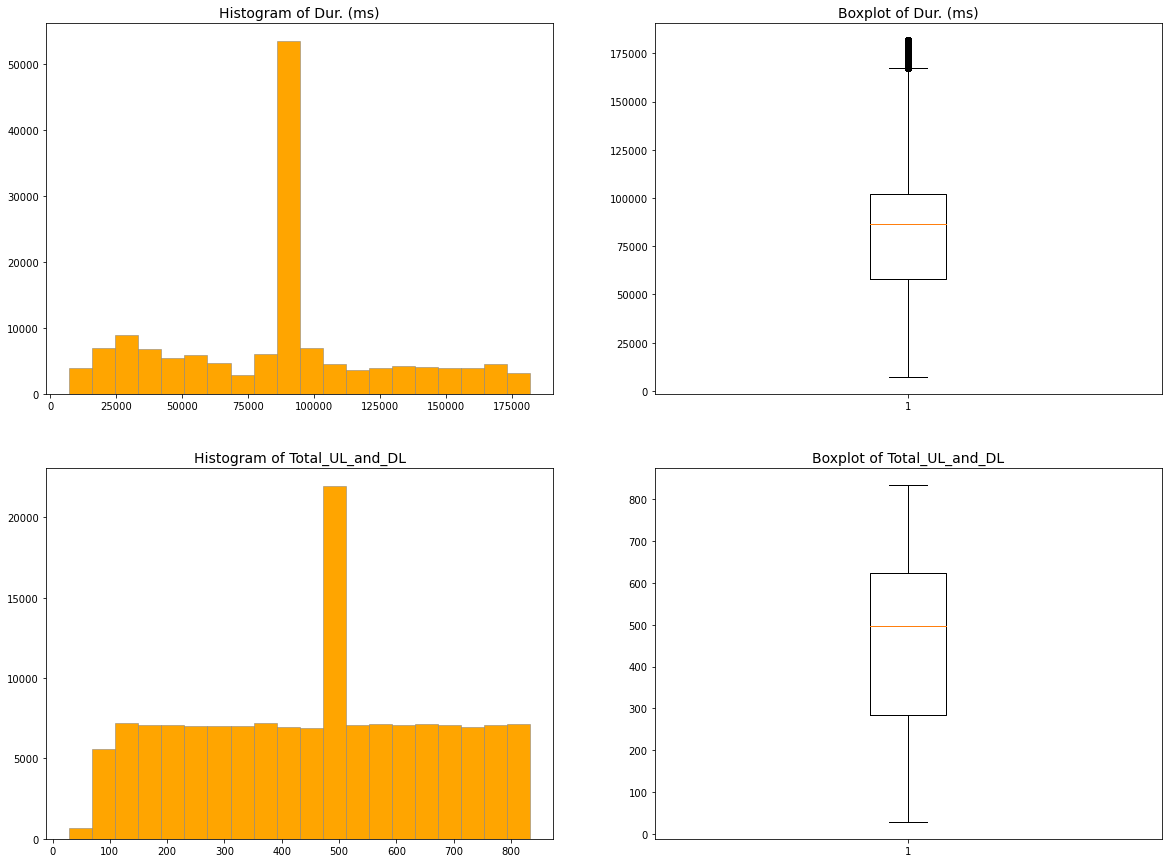

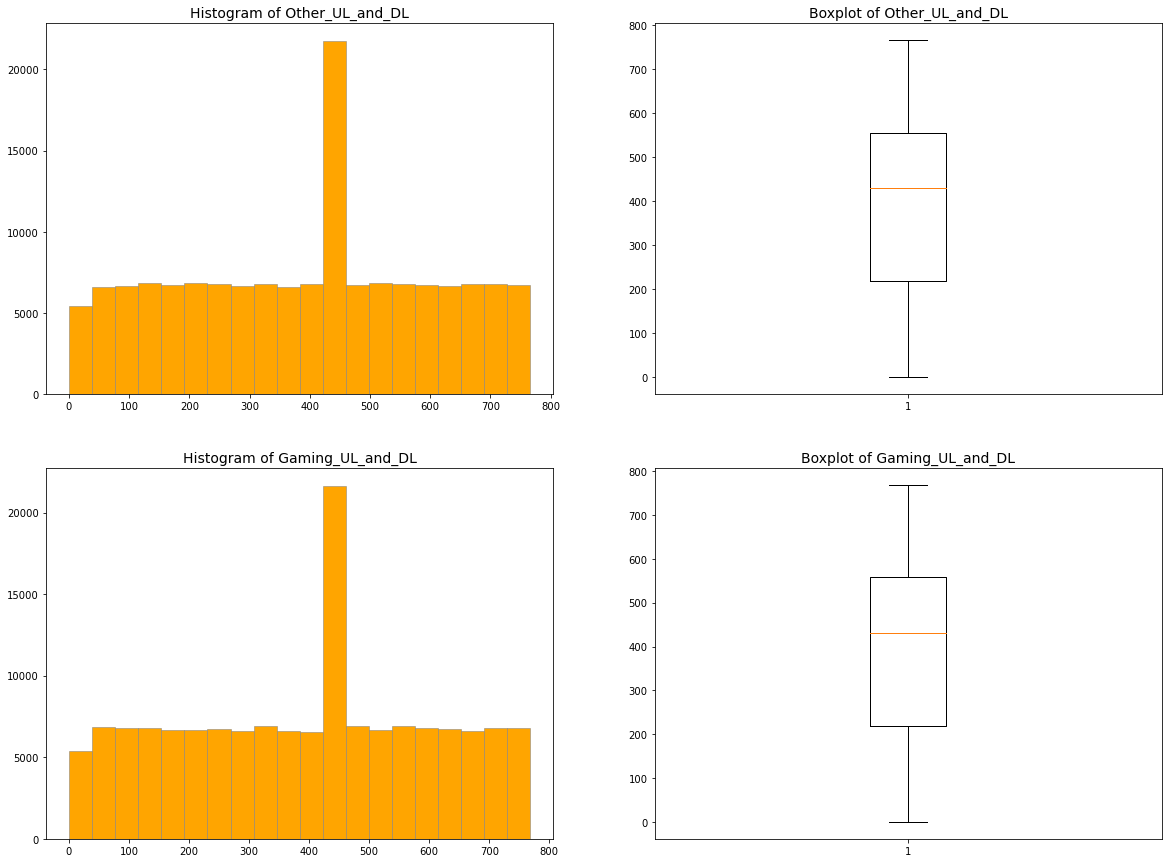

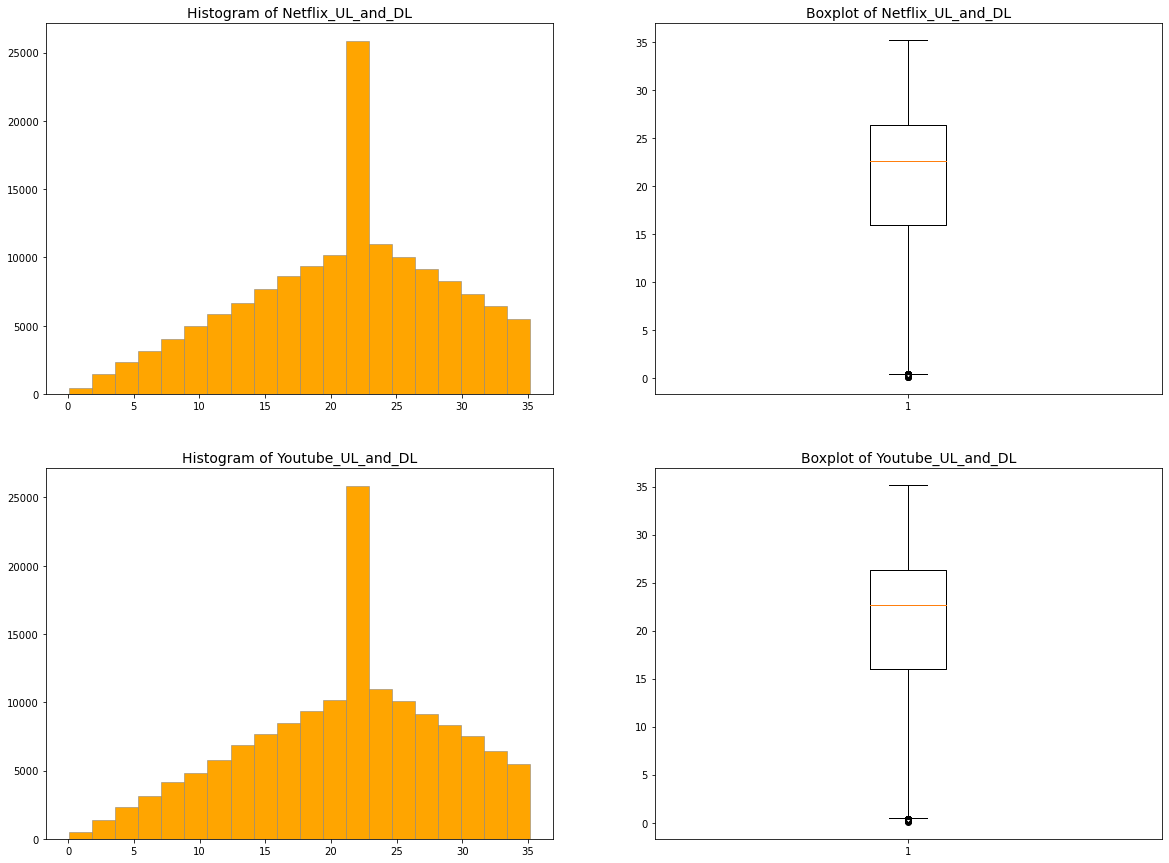

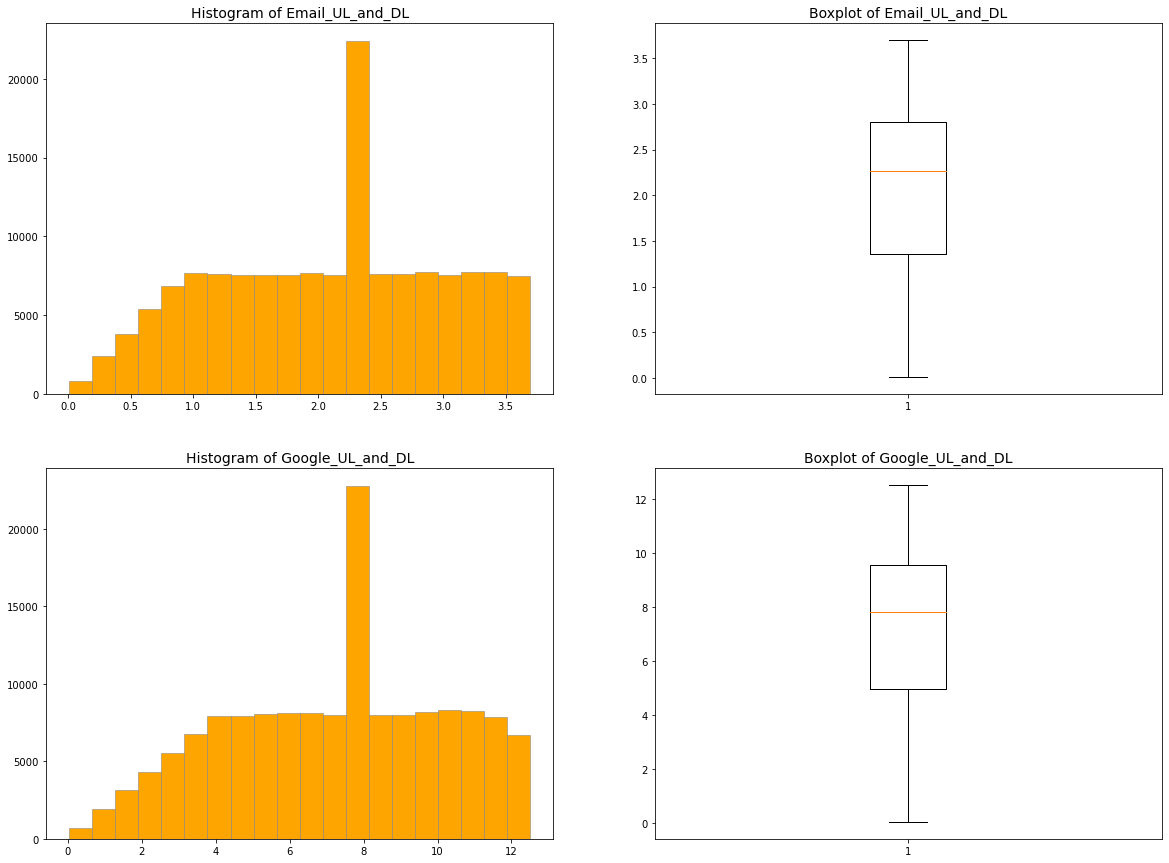

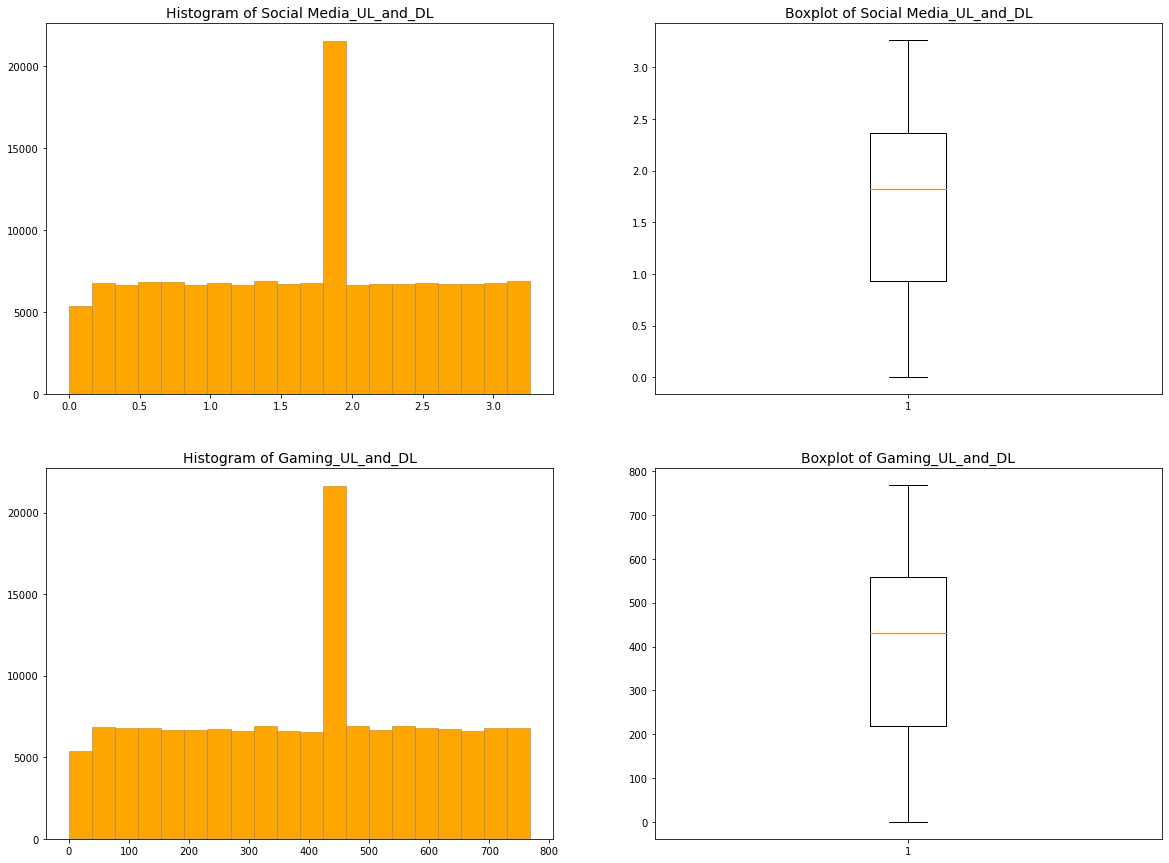

In [81]:
# Graphical univariate analysis plots after fixing outliers

plot_univariate(user_overview_data,'Dur. (ms)','Total_UL_and_DL')
plot_univariate(user_overview_data,'Other_UL_and_DL','Gaming_UL_and_DL')
plot_univariate(user_overview_data,'Netflix_UL_and_DL','Youtube_UL_and_DL')
plot_univariate(user_overview_data,'Email_UL_and_DL','Google_UL_and_DL')
plot_univariate(user_overview_data,'Social Media_UL_and_DL','Gaming_UL_and_DL')